# CH.03 - 5.9.2.1

In [6]:
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import util.util as util
from util.VisualizeDataset import VisualizeDataset

import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import argparse

In [7]:
DATA_PATH = Path('./data/')
DATASET_FNAME = 'result-given/chapter4_result.csv'
RESULT_FNAME = 'intermediate/chapter5_result.csv'

In [8]:
dataset = pd.read_csv(DATA_PATH / DATASET_FNAME, index_col=0)
dataset.index = pd.to_datetime(dataset.index)
dataset

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,mag_watch_z_freq_1.1_Hz_ws_40,mag_watch_z_freq_1.2_Hz_ws_40,mag_watch_z_freq_1.3_Hz_ws_40,mag_watch_z_freq_1.4_Hz_ws_40,mag_watch_z_freq_1.5_Hz_ws_40,mag_watch_z_freq_1.6_Hz_ws_40,mag_watch_z_freq_1.7_Hz_ws_40,mag_watch_z_freq_1.8_Hz_ws_40,mag_watch_z_freq_1.9_Hz_ws_40,mag_watch_z_freq_2.0_Hz_ws_40
2016-02-08 18:28:25.656222,-0.090433,0.164264,9.631744,9.550840,0.197679,1.513430,-0.008810,0.018548,-0.001514,0.001668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:28.406222,-0.088630,0.170400,9.628089,9.551315,0.197073,1.505779,-0.008870,0.018457,-0.000912,0.001715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:31.156222,-0.084584,0.171914,9.620668,9.552778,0.194151,1.509347,-0.008438,0.018855,0.000159,0.002014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:33.906222,-0.081381,0.170345,9.634230,9.546574,0.200030,1.507089,-0.008650,0.018903,-0.003626,0.002016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-08 18:28:36.656222,-0.097313,0.136100,9.623921,9.545983,0.197746,1.516108,-0.011363,0.015230,-0.023521,0.002096,...,1.932933e+00,-1.187140e+00,1.130804e+00,-4.046004e-01,1.012557e+00,1.166098e+00,5.130568e-01,3.791358e-01,3.274394e-01,3.076108e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:40:53.156222,-0.163787,0.183251,9.611648,-5.261667,-5.561800,7.313867,-0.008054,0.020805,0.001829,0.358750,...,1.087130e-12,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12
2016-02-08 20:40:55.906222,-0.163480,0.184232,9.614230,-5.261667,-5.561800,7.313867,-0.008538,0.021053,0.001998,0.358750,...,1.087130e-12,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12
2016-02-08 20:40:58.656222,-0.164780,0.184331,9.615484,-5.261667,-5.561800,7.313867,-0.008474,0.021411,0.002339,0.358750,...,1.087130e-12,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12
2016-02-08 20:41:01.406222,-0.162506,0.185287,9.608581,-5.261667,-5.561800,7.313867,-0.008452,0.021322,0.002050,0.358750,...,1.087130e-12,-1.115552e-12,1.172396e-12,-1.342926e-12,1.310951e-12,-1.346478e-12,1.378453e-12,-1.460165e-12,1.517009e-12,-1.524114e-12


In [9]:
DataViz = VisualizeDataset()

clusteringNH = NonHierarchicalClustering()
clusteringH = HierarchicalClustering()

## K-means

In [10]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(
        dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6516851950601094
k = 3
silhouette = 0.6533601223162753
k = 4
silhouette = 0.674377078672515
k = 5
silhouette = 0.6848202359125899
k = 6
silhouette = 0.668413344208659
k = 7
silhouette = 0.6522987459248646
k = 8
silhouette = 0.6565540404029986
k = 9
silhouette = 0.6553440914569488


Figure saved to figures/figure_1.png


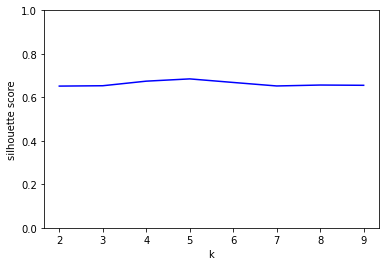

Highest K-Means silhouette score: k = 5


In [11]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], 
                xlabel='k', ylabel='silhouette score',ylim=[0, 1], line_styles=['b-'])
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

## Kmediods

In [12]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(
        dataset), ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6549794407510902
k = 3
silhouette = 0.6236776344128219
k = 4
silhouette = 0.6108298795138355
k = 5
silhouette = 0.6581278685463345
k = 6
silhouette = 0.6390084985344332
k = 7
silhouette = 0.6432305969496441
k = 8
silhouette = 0.6132586911031817
k = 9
silhouette = 0.6015892317481876


Figure saved to figures/figure_2.png


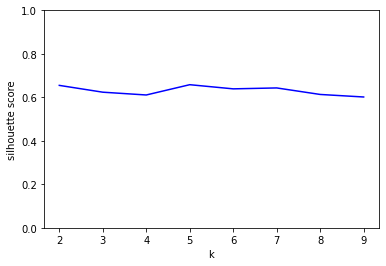

Highest K-Medoids silhouette score: k = 5
Figure saved to figures/figure_3.png


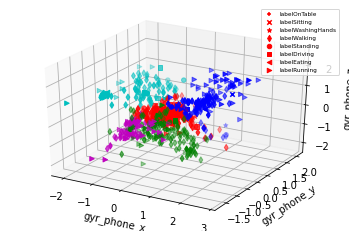

Figure saved to figures/figure_4.png


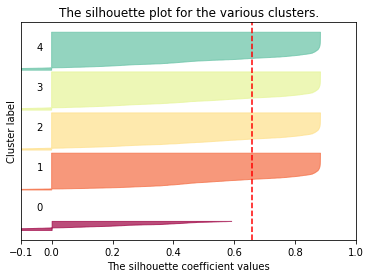

\multirow{2}{*}{ gyr_phone_x } & mean  &  -0.00 &  0.29 &  1.10 &  -1.06 &  -0.99\\
 & std  &  0.17 &  0.59 &  0.46 &  0.47 &  0.39\\
\multirow{2}{*}{ gyr_phone_y } & mean  &  0.05 &  -0.67 &  0.40 &  0.24 &  -0.01\\
 & std  &  0.17 &  0.35 &  0.51 &  0.57 &  0.45\\
\multirow{2}{*}{ gyr_phone_z } & mean  &  -0.00 &  -0.27 &  0.76 &  0.82 &  -0.91\\
 & std  &  0.13 &  0.52 &  0.66 &  0.33 &  0.39\\
labelOnTable  & percentage  &  100.00 \% &  0.00 \% &  0.00 \% &  0.00 \% &  0.00 \%\\
labelSitting  & percentage  &  98.00 \% &  0.80 \% &  0.40 \% &  0.40 \% &  0.40 \%\\
labelWashingHands  & percentage  &  87.72 \% &  5.26 \% &  3.51 \% &  0.00 \% &  3.51 \%\\
labelWalking  & percentage  &  26.23 \% &  22.48 \% &  18.50 \% &  16.16 \% &  16.63 \%\\
labelStanding  & percentage  &  93.84 \% &  2.84 \% &  0.95 \% &  1.42 \% &  0.95 \%\\
labelDriving  & percentage  &  98.06 \% &  0.56 \% &  0.28 \% &  1.11 \% &  0.00 \%\\
labelEating  & percentage  &  96.95 \% &  2.03 \% &  0.51 \% &  0.51 \% 

In [13]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(dataset), 
                                                     ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 
                                                     k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', 
                                     ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 'label')

## hierarchical

In [14]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset, l = clusteringH.agglomerative_over_instances(dataset, 
                                                          ['gyr_phone_x', 'gyr_phone_y', 'gyr_phone_z'], 
                                                          k, 'euclidean', use_prev_linkage=True, 
                                                          link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6015892317481876
k = 3
silhouette = 0.6015892317481876
k = 4
silhouette = 0.6015892317481876
k = 5
silhouette = 0.6015892317481876
k = 6
silhouette = 0.6015892317481876
k = 7
silhouette = 0.6015892317481876
k = 8
silhouette = 0.6015892317481876
k = 9
silhouette = 0.6015892317481876


Figure saved to figures/figure_5.png


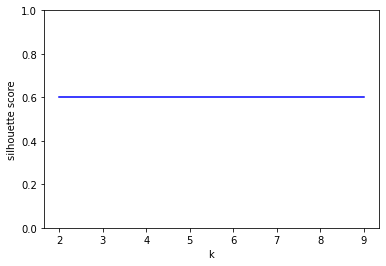

In [15]:
if k == k_values[0]:
        DataViz.plot_dendrogram(dataset, l)
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])